In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [8]:
df.shape

(9994, 13)

In [9]:
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (17, 13)


In [11]:
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [12]:
df = df.drop_duplicates()

In [13]:
df.count()

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

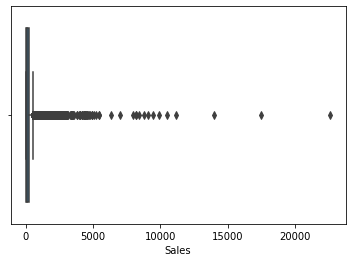

In [14]:
sns.boxplot(x=df['Sales'])

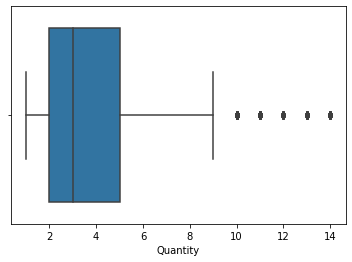

In [15]:
sns.boxplot(x=df['Quantity'])

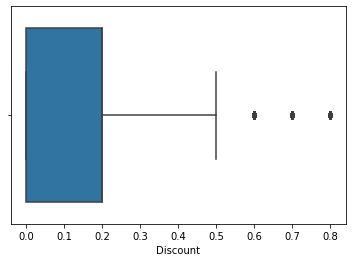

In [16]:
sns.boxplot(x=df['Discount'])

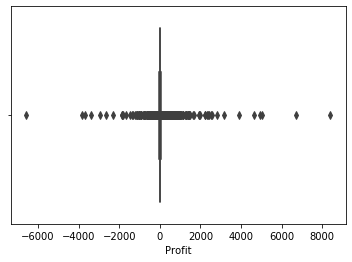

In [17]:
sns.boxplot(x=df['Profit'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Postal Code    66785.0000
Sales            192.6700
Quantity           3.0000
Discount           0.2000
Profit            27.6458
dtype: float64


In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(7127, 13)

In [20]:
df.count()

Ship Mode       7127
Segment         7127
Country         7127
City            7127
State           7127
Postal Code     7127
Region          7127
Category        7127
Sub-Category    7127
Sales           7127
Quantity        7127
Discount        7127
Profit          7127
dtype: int64

In [21]:
Best_Sales_States = df.groupby("State").Sales.sum().nlargest(n =5)
Best_Profits_States = df.groupby("State").Profit.sum().nlargest(n =5)
Best_Discount_States = df.groupby("State").Discount.sum().nlargest(n =5)

In [22]:
Best_Sales_States.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania'], dtype='object', name='State')

In [23]:
Best_Profits_States.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Texas'], dtype='object', name='State')

In [25]:
Best_Discount_States.index

Index(['Texas', 'California', 'Pennsylvania', 'Ohio', 'Florida'], dtype='object', name='State')

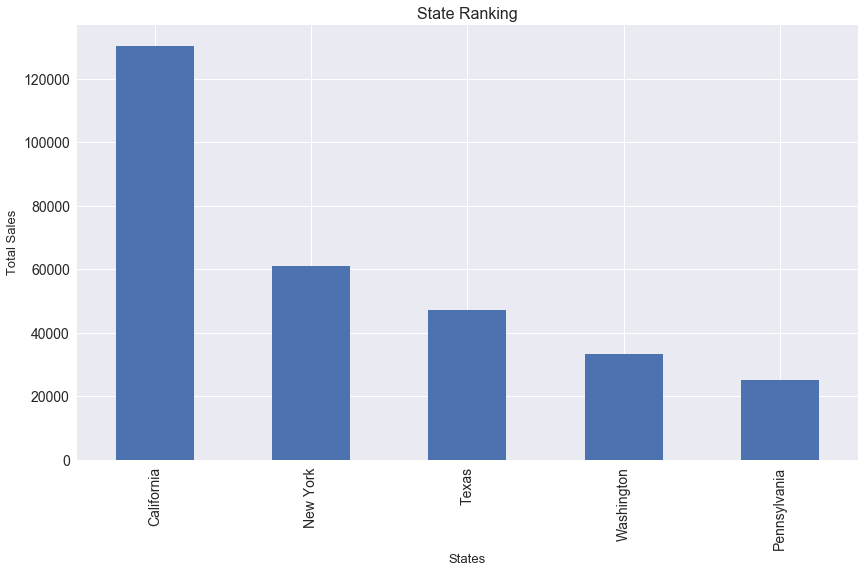

In [26]:
plt.style.use('seaborn')
Best_Sales_States.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("State Ranking",fontsize =16)
plt.show()

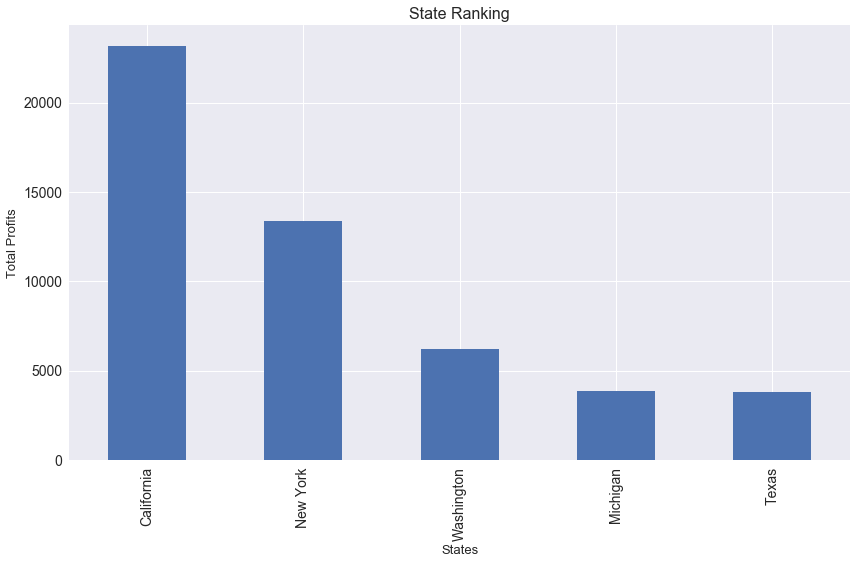

In [27]:
plt.style.use('seaborn')
Best_Profits_States.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("State Ranking",fontsize =16)
plt.show()

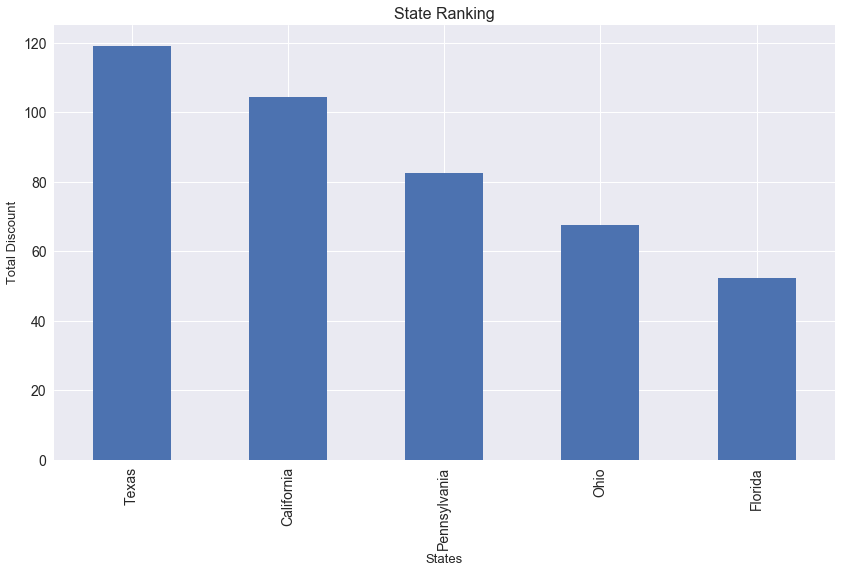

In [29]:
plt.style.use('seaborn')
Best_Discount_States.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Discount",fontsize =13)
plt.title("State Ranking",fontsize =16)
plt.show()

In [31]:
Best_Sales_City = df.groupby("City").Sales.sum().nlargest(n =5)
Best_Profits_City = df.groupby("City").Profit.sum().nlargest(n =5)
Best_Discount_City = df.groupby("City").Discount.sum().nlargest(n =5)

In [33]:
Best_Sales_City.index

Index(['Los Angeles', 'New York City', 'Seattle', 'San Francisco',
       'Philadelphia'],
      dtype='object', name='City')

In [34]:
Best_Profits_City.index

Index(['New York City', 'Los Angeles', 'San Francisco', 'Seattle',
       'San Diego'],
      dtype='object', name='City')

In [35]:
Best_Discount_City.index

Index(['Philadelphia', 'Houston', 'Los Angeles', 'Chicago', 'New York City'], dtype='object', name='City')

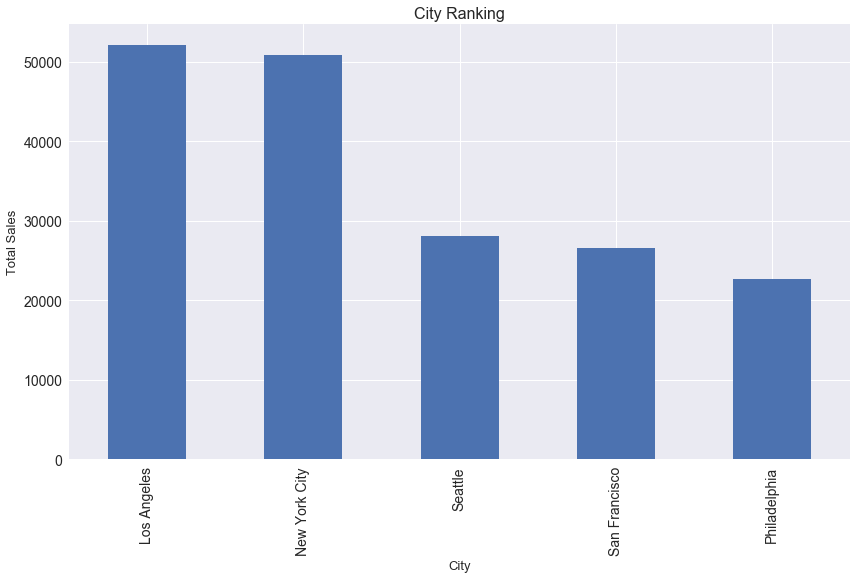

In [36]:
plt.style.use('seaborn')
Best_Sales_City.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("City Ranking",fontsize =16)
plt.show()

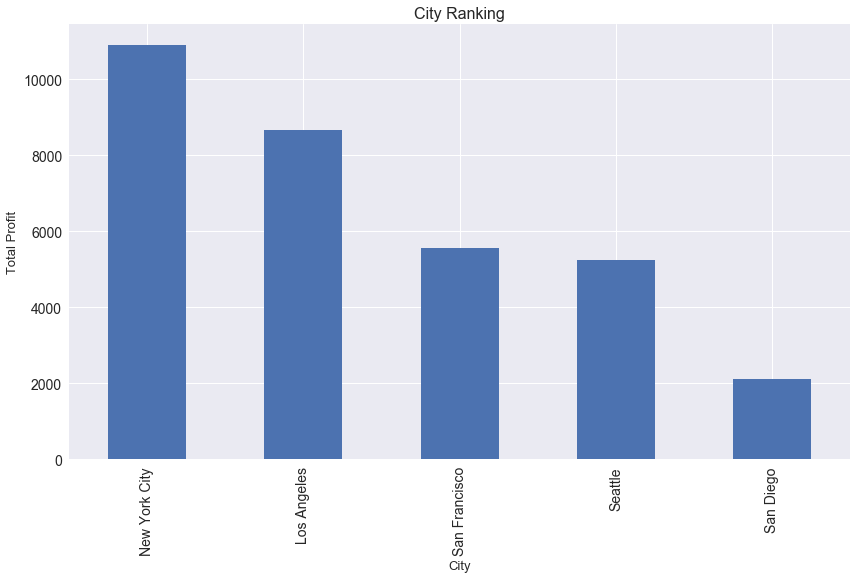

In [37]:
plt.style.use('seaborn')
Best_Profits_City.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Profit",fontsize =13)
plt.title("City Ranking",fontsize =16)
plt.show()

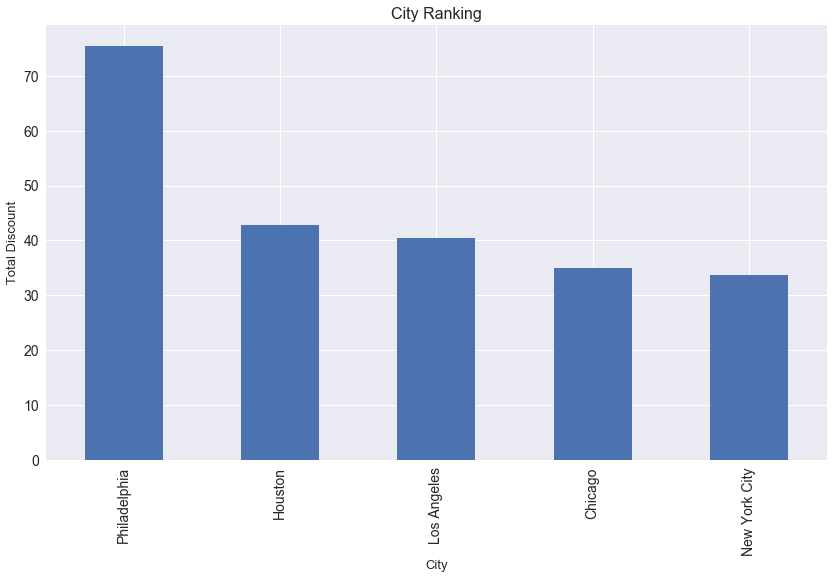

In [38]:
plt.style.use('seaborn')
Best_Discount_City.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Discount",fontsize =13)
plt.title("City Ranking",fontsize =16)
plt.show()

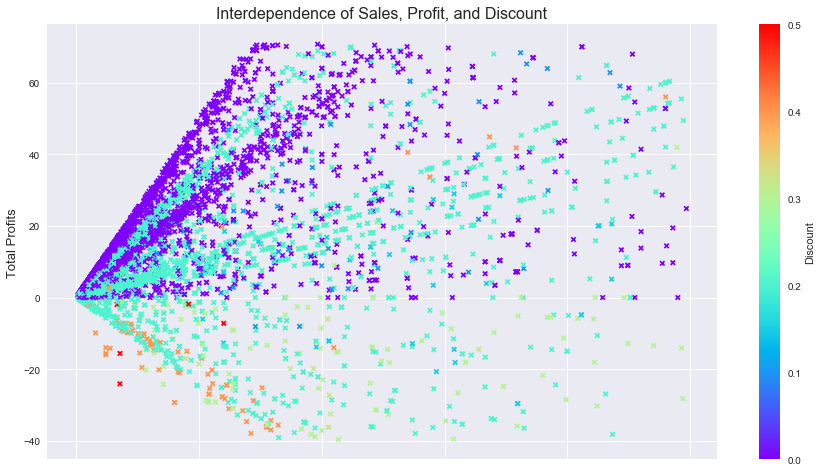

In [39]:
plt.style.use('seaborn')
df.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="rainbow")

plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

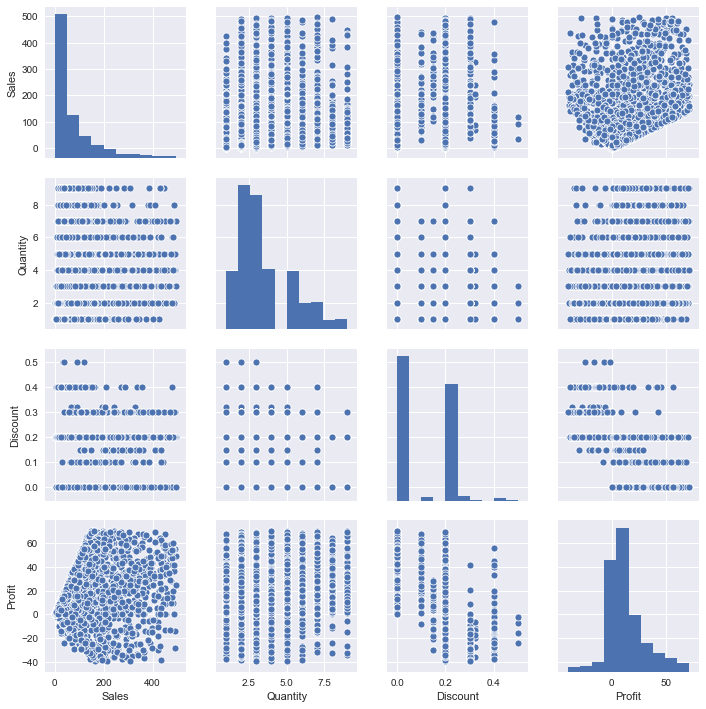

In [40]:
retail=df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(retail)

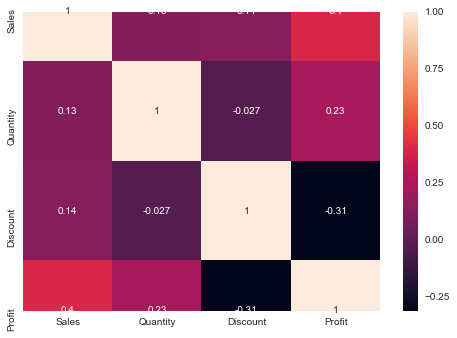

In [41]:
correlation=retail.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

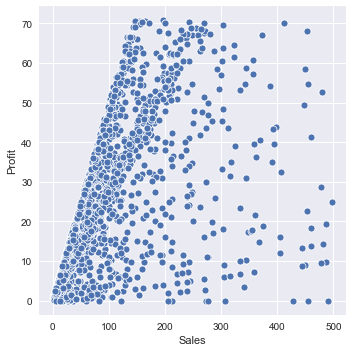

In [42]:
data=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

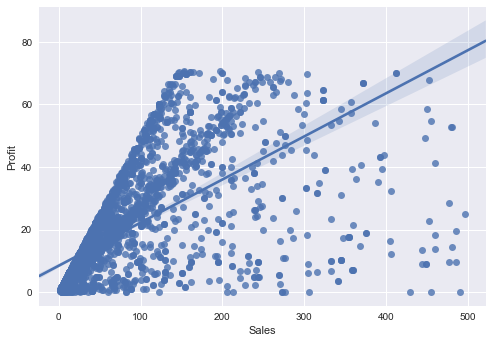

In [43]:
sns.regplot(data['Sales'],data['Profit'])